In [2]:
#=====[ Import dependencies ]====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append('data')

#=====[ Import Data ]=====
import coordData1 as cd
import coordKeys as keys

%matplotlib inline

#Step 1: Import Data

In [3]:
#=====[ Get data from python file and place in DataFrame ]=====
data = cd.data
df = pd.DataFrame(data,columns=keys.columns)

#Step 2: Isolate Individual Squats

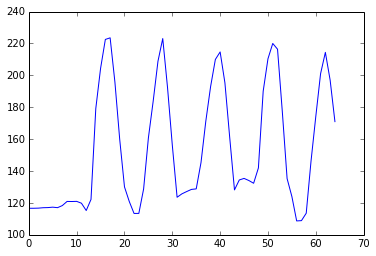

In [4]:
#=====[ Extract y_coords for Neck -- provides a stable point of reference ]=====
y_coords = [coord[1] for coord in df['Neck']]
plt.plot(y_coords)

#Get Max Indices

In [5]:
#=====[ Gets local maxes within accepted epsilon of global max and with max len(y_coors)/gamma maxes ]=====
def get_local_maxes(y_coords, epsilon=0.05, gamma=5):
    
    local_maxes = []
    height = np.max(y_coords)
    gradient = np.gradient(y_coords)
    
    #=====[ Checks for negative slope and neck height within margin epsilon of global max ]=====
    for index, dy in enumerate(gradient[1:]):
        if dy < 0 and np.abs(y_coords[index] - height)/height < epsilon:
            local_maxes.append(index)
            
    #=====[ Refines mins to ensure we only get local maximums ]
    maxes = set()
    for index, x in enumerate(local_maxes):
        max_x = max((y_coords[x_del],x_del) for x_del in range(local_maxes[index]-gamma, local_maxes[index] + gamma + 1) if x_del in local_maxes)
        maxes.add(max_x[1])
        
    return sorted(maxes)

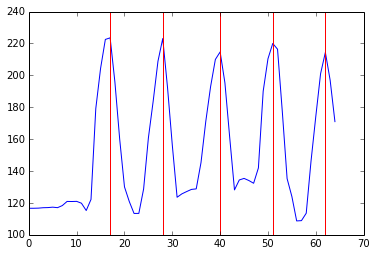

In [6]:
#=====[ Get maxes and plot with y_coords ]=====
maxes = get_local_maxes(y_coords)
plt.plot(y_coords)

for divide in maxes:
    plt.axvline(divide,color='r')

#Separate Squats based on max points found

In [7]:
squats = []

#=====[ Get points from DF between each max found -- constitutes a single squat ]=====
for index,x in enumerate(maxes):
    if(index == len(maxes) -1 ):
        continue
    squats.append(df[x:maxes[index+1]])
    

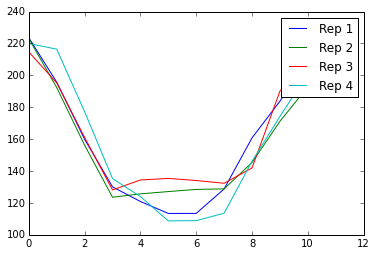

In [8]:
#=====[ Visual comparison between reps ]=====
for index, squat in enumerate(squats):
    plt.plot([coord[1] for coord in squat['Neck']],label="Rep " + str(index + 1))
plt.legend()